### Checkpoint 1: Data Cleaning 1

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, matplotlib.ticker as ticker

In [2]:
companies = pd.read_csv('companies.csv', encoding = 'palmos')
rounds2 = pd.read_csv('rounds2.csv', encoding = 'palmos')
print('size of file companies.csv {0}, size of file rounds2.csv {1} '.format(companies.shape, rounds2.shape))

size of file companies.csv (66368, 10), size of file rounds2.csv (114949, 6) 


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
# chceking empty entries in name column
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [5]:
# replacing the empty entries in name column with extracted name from permalink
companies.loc[companies.name.isnull(),'name'] = companies.loc[companies.name.isnull(),'permalink'].apply(lambda x:x.split('/')[-1].strip())

In [6]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [7]:
# rechecking the empty entries
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [8]:
# converting names to upper case
companies['permalink'] = companies.permalink.str.upper()

In [9]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/ORGANIZATION/ÃERON,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/ORGANIZATION/Ã”ASYS-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [10]:
# number of unique entries
companies.permalink.nunique()

66368

In [11]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [12]:
# change the casing of companies unique id into uppercase
rounds2.company_permalink = rounds2.company_permalink.str.upper()

In [13]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
# number of unique companies in rounds2
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                  19
/ORGANIZATION/QUELLAN                     18
/ORGANIZATION/SEMPRIUS                    18
/ORGANIZATION/EXAGEN-DIAGNOSTICS          18
/ORGANIZATION/VOCALOCITY                  17
                                          ..
/ORGANIZATION/YETI-DATA                    1
/ORGANIZATION/DREAMSCAPE-BLUE              1
/ORGANIZATION/AFRICA-TALENT-MANAGEMENT     1
/ORGANIZATION/ROCK-MOBILE                  1
/ORGANIZATION/RELEVANCE-INC                1
Name: company_permalink, Length: 66368, dtype: int64

In [15]:
# checking the list of companies which are not present in both the files
set(rounds2.company_permalink).symmetric_difference(set(companies.permalink))

set()

In [16]:
# check the details of duplicate entries in company_permalink
rounds2[rounds2.company_permalink.duplicated()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
...,...,...,...,...,...,...
114939,/ORGANIZATION/ZZISH,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,NaN,31-10-2014,400000.0
114940,/ORGANIZATION/ZZISH,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0


In [17]:
# check if there are any duplicate rows
rounds2[rounds2.duplicated()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [18]:
# merging companies and rounds into new dataset
master_frame =  rounds2.merge(companies, how = 'outer', left_on = 'company_permalink', right_on = 'permalink')

In [19]:
# drop the redundant column 'permalink'
master_frame.drop('permalink', axis = 1, inplace = True)

In [20]:
rounds2.shape

(114949, 6)

In [21]:
companies.shape

(66368, 10)

In [22]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114949 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [23]:
# checking the available funding types
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

### Checkpoint 2: Funding Type Analysis

In [24]:
# create a dataframe specific to Spark Funds investment constraint:interested types of fundings :'venture','angel','seed','private_equity'
funding_sparks =  master_frame[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]

In [25]:
funding_sparks.shape

(94397, 15)

In [26]:
# identify columns with missing values
funding_sparks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 114947
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94397 non-null  object 
 1   funding_round_permalink  94397 non-null  object 
 2   funding_round_type       94397 non-null  object 
 3   funding_round_code       31120 non-null  object 
 4   funded_at                94397 non-null  object 
 5   raised_amount_usd        80627 non-null  float64
 6   name                     94397 non-null  object 
 7   homepage_url             90252 non-null  object 
 8   category_list            91900 non-null  object 
 9   status                   94397 non-null  object 
 10  country_code             87076 non-null  object 
 11  state_code               85118 non-null  object 
 12  region                   85838 non-null  object 
 13  city                     85841 non-null  object 
 14  founded_at           

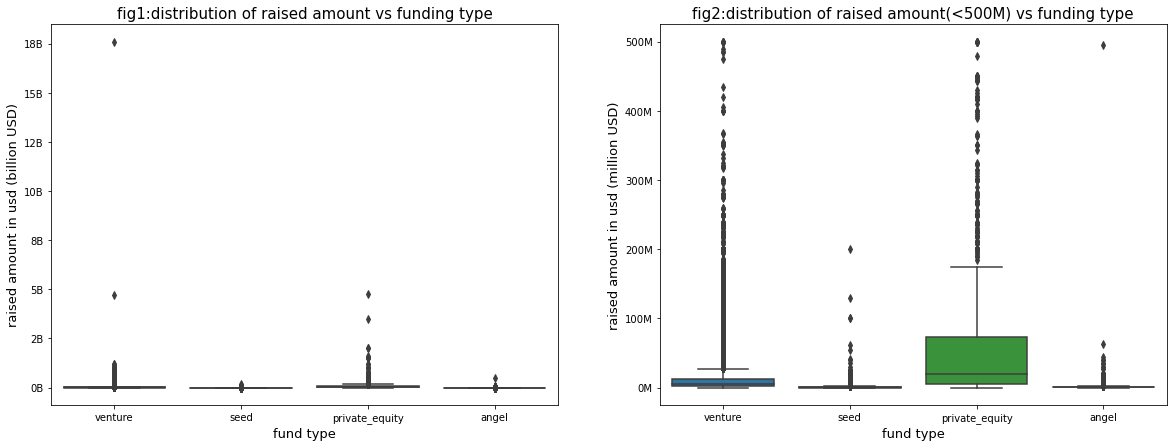

In [27]:
# check the spread of fund raised for each type of funds
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plt.title('fig1:distribution of raised amount vs funding type', loc = 'center',fontsize = 15)
p = sns.boxplot(funding_sparks.funding_round_type, funding_sparks.raised_amount_usd)
ylabels = ['{0:.0f}B'.format(y) for y in p.get_yticks()/1e9]
p.set_yticklabels(ylabels)
plt.ylabel('raised amount in usd (billion USD)', fontsize = 13)
plt.xlabel('fund type',fontsize = 13)
# check the presence of outliers when raised amount is below 500M]
plt.subplot(1,2,2)
g = sns.boxplot(funding_sparks.funding_round_type, funding_sparks.loc[funding_sparks.raised_amount_usd <= 500000000,'raised_amount_usd'])
plt.title('fig2:distribution of raised amount(<500M) vs funding type', loc = 'center',fontsize = 15)
ylabels = ['{0:.0f}M'.format(y) for y in g.get_yticks()/1e6]
g.set_yticklabels(ylabels)
plt.ylabel('raised amount in usd (million USD)', fontsize = 13)
plt.xlabel('fund type',fontsize = 13)
plt.savefig('raised amount distri.png')

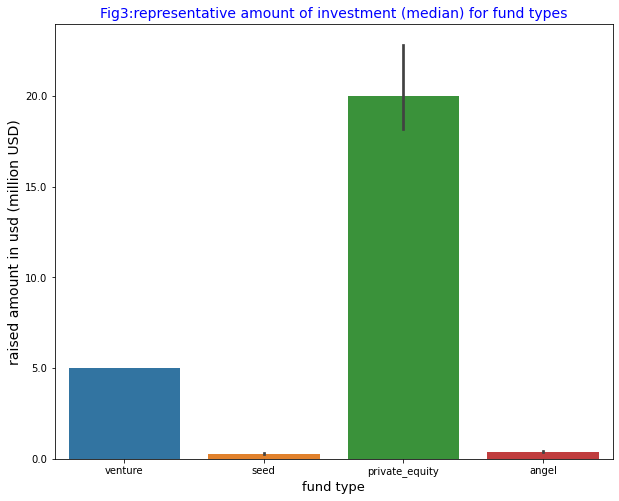

In [28]:
# plot to compare the representative values of different fund types
plt.figure(figsize = (10,8))
g = sns.barplot(funding_sparks.funding_round_type,funding_sparks.raised_amount_usd, estimator = np.median)
ylabels = ['{}'.format(y) for y in g.get_yticks()/1e6]
g.set_yticklabels(ylabels)
plt.ylabel('raised amount in usd (million USD)',fontsize = 14)
plt.xlabel('fund type',fontsize = 13)
plt.title('Fig3:representative amount of investment (median) for fund types', loc = 'center', fontsize = '14', color = 'blue')
plt.savefig('representative amount of investment for fund types.png')

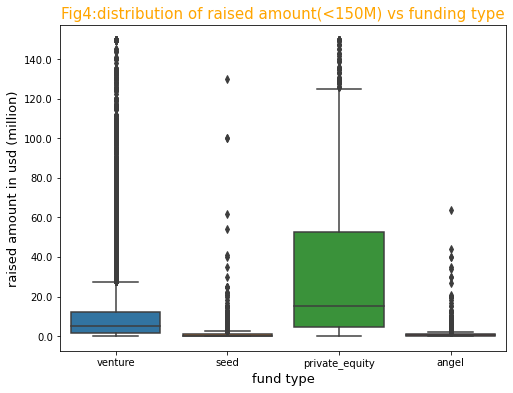

In [29]:
# check the presence of outliers when raised amount is below 150M
plt.figure(figsize = (8,6))
g = sns.boxplot(funding_sparks.funding_round_type, funding_sparks.loc[funding_sparks.raised_amount_usd <= 150000000,'raised_amount_usd'])
plt.title('Fig4:distribution of raised amount(<150M) vs funding type', loc = 'center', fontsize = '15', color = 'orange')
ylabels = ['{}'.format(y) for y in g.get_yticks()/1e6]
g.set_yticklabels(ylabels)
plt.ylabel('raised amount in usd (million)', fontsize = 13)
plt.xlabel('fund type',fontsize = 13)
plt.savefig('distribution of raised amount(150M) vs funding type.png')

In [30]:
# check the mean, median(50 percentile values), count and percentile distribution of fund raised for each category
funding_sparks.groupby('funding_round_type').describe(percentiles = [0.25,0.5,0.75,0.9,1])

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         4860.0  9.586945e+05  7.404397e+06  0.0   
private_equity                1936.0  7.330859e+07  1.981135e+08  0.0   
seed                         23603.0  7.198180e+05  2.221733e+06  0.0   
venture                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                     \
                           25%         50%         75%          90%   
funding_round_type                                                    
angel                150000.00    400000.0   1000000.0    1858364.6   
private_equity      5000000.00  20000000.0  75000000.0  160186227.5   
seed                  55000.00    275000.0   1000000.0    1929900.0   
venture             1600901.75   5000000.0  12000000.0   25000000.0   

                                                
                            100%           max  
funding_round_type                              
angel               4.945120e+08  4.945120e+08  
private_equity      4.745460e+09  4.745460e+09  
seed                2.000000e+08  2.000000e+08  
venture             1.760000e+10  1.760000e+10

##### venture is the most suited for Spark Funds as investments are majorly in the range of 5M to 15M and also because the number of investments are high

In [31]:
# filtering data to have details of only the interested investment type (private_equity)
venture_dataset = master_frame[master_frame.funding_round_type == 'venture']
# reset dataset index
venture_dataset.reset_index(drop = True, inplace = True)

In [32]:
# identify columns with missing values
venture_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55494 entries, 0 to 55493
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funding_round_code       30985 non-null  object 
 4   funded_at                55494 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   name                     55494 non-null  object 
 7   homepage_url             52549 non-null  object 
 8   category_list            54362 non-null  object 
 9   status                   55494 non-null  object 
 10  country_code             52619 non-null  object 
 11  state_code               51698 non-null  object 
 12  region                   51940 non-null  object 
 13  city                     51940 non-null  object 
 14  founded_at            

### checkpoint 3 :country analysis

In [33]:
venture_dataset.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [34]:
# checking the number of empty cells in country_code column
venture_dataset.country_code.isnull().sum()

2875

In [35]:
# check whether we can impute the missing values in country_code by checking the data available in columns region and city
venture_dataset[(venture_dataset.country_code.isnull()) & ((~(venture_dataset.city.isnull())) | (~(venture_dataset.region.isnull())))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [36]:
# check how many entries having empty country_code has valid entries in raised_amount_usd
venture_dataset[(venture_dataset.country_code.isnull()) & (~(venture_dataset.raised_amount_usd.isnull()))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
36,/ORGANIZATION/1234ENTER,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
39,/ORGANIZATION/123GREETINGS,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997
55,/ORGANIZATION/17-MEDIA,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015
65,/ORGANIZATION/1800DIAPERS,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7000000.0,1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55240,/ORGANIZATION/ZKEY-COM,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,10000000.0,Zkey.com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN
55241,/ORGANIZATION/ZLANGO,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,12000000.0,Zlango,http://www.zlango.com,NaN,closed,NaN,NaN,NaN,NaN,NaN
55268,/ORGANIZATION/ZOLK-C,/funding-round/327f2828712fa42899d272320ec31be6,venture,NaN,13-01-2012,636731.0,Zolk C,http://www.zolkc.com,Games|Mobile,operating,NaN,NaN,NaN,NaN,01-11-2007
55338,/ORGANIZATION/ZOOTCARD,/funding-round/c662b7cb18f7be11f811cc9c5b504bb6,venture,NaN,26-06-2014,750000.0,Zootcard,http://www.zootcard.com,Curated Web,operating,NaN,NaN,NaN,NaN,01-06-2012


In [37]:
#filter data based on countries and recheck missing values
#check number of investment and amount invested in venture type across various countries
countries_sorted = pd.DataFrame(venture_dataset.country_code.value_counts())
# amount invested in billion
countries_sorted['total investment(billion)'] = venture_dataset.groupby('country_code').raised_amount_usd.sum()/1e9
countries_sorted = countries_sorted.sort_values('total investment(billion)', ascending = False).rename(columns = {'country_code':'count'})
countries_sorted.index.name = 'country code'
countries_sorted

,count,total investment(billion)
country code,,
USA,38372,422.510843
CHN,2087,39.835419
GBR,2303,20.245627
IND,992,14.391859
CAN,1346,9.583332
...,...,...
BHR,1,0.000000
PSE,1,0.000000
CRI,1,0.000000


In [38]:
# identify the top 9 countries with highest investment
top_9_countries = countries_sorted[:9].index
top_9_countries

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country code')

In [39]:
# create a dataset containind data for only the top 9 countries
top9 = venture_dataset[venture_dataset.country_code.isin(top_9_countries)]

In [40]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48099 entries, 0 to 55492
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        48099 non-null  object 
 1   funding_round_permalink  48099 non-null  object 
 2   funding_round_type       48099 non-null  object 
 3   funding_round_code       26930 non-null  object 
 4   funded_at                48099 non-null  object 
 5   raised_amount_usd        44383 non-null  float64
 6   name                     48099 non-null  object 
 7   homepage_url             45902 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   48099 non-null  object 
 10  country_code             48099 non-null  object 
 11  state_code               47768 non-null  object 
 12  region                   47596 non-null  object 
 13  city                     47596 non-null  object 
 14  founded_at            

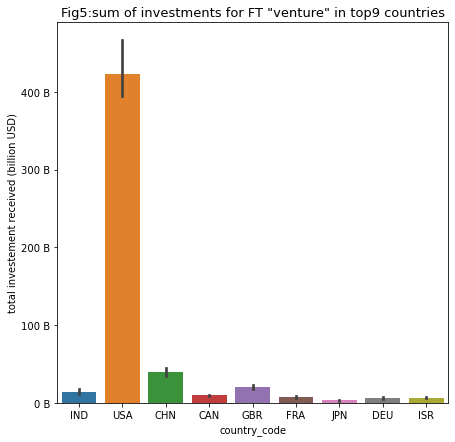

In [41]:
fig = plt.figure(figsize = (7,7))
plt.title('Fig5:sum of investments for FT "venture" in top9 countries', loc = 'center', fontsize = 13)
g = sns.barplot(top9.country_code, top9.raised_amount_usd, estimator = np.sum)
ylabels = ['{0:.0f} B'.format(y) for y in g.get_yticks()/1e9]
g.set_yticklabels(ylabels)
plt.ylabel('total investement received (billion USD)')
plt.savefig('top9 countries.png')

### checkpoint 4: Sector Analysis 1

In [42]:
# load the mapping dataset
mapping = pd.read_csv('mapping.csv', encoding = 'palmos')

In [43]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [44]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [45]:
# prepare the dataset top_9 for sector analysis
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48099 entries, 0 to 55492
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        48099 non-null  object 
 1   funding_round_permalink  48099 non-null  object 
 2   funding_round_type       48099 non-null  object 
 3   funding_round_code       26930 non-null  object 
 4   funded_at                48099 non-null  object 
 5   raised_amount_usd        44383 non-null  float64
 6   name                     48099 non-null  object 
 7   homepage_url             45902 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   48099 non-null  object 
 10  country_code             48099 non-null  object 
 11  state_code               47768 non-null  object 
 12  region                   47596 non-null  object 
 13  city                     47596 non-null  object 
 14  founded_at            

In [46]:
# checking missing values in category_list column
top9.category_list.isnull().sum()

485

In [47]:
# drop these entries as they do not contribute to the analysis
top9.dropna(axis = 0, subset = ['category_list'], inplace = True)

<ipython-input-47-e6b93eb407b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9.dropna(axis = 0, subset = ['category_list'], inplace = True)


In [48]:
# check if any relevant column is having missing values
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47614 entries, 0 to 55492
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        47614 non-null  object 
 1   funding_round_permalink  47614 non-null  object 
 2   funding_round_type       47614 non-null  object 
 3   funding_round_code       26717 non-null  object 
 4   funded_at                47614 non-null  object 
 5   raised_amount_usd        44118 non-null  float64
 6   name                     47614 non-null  object 
 7   homepage_url             45505 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   47614 non-null  object 
 10  country_code             47614 non-null  object 
 11  state_code               47286 non-null  object 
 12  region                   47116 non-null  object 
 13  city                     47116 non-null  object 
 14  founded_at            

In [49]:
# create a new column for primary sector in upper case format
top9['primary_sector'] =  top9.category_list.apply(lambda x:x.split('|')[0].upper())
top9.head(4)

<ipython-input-49-ae2a7daf99ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9['primary_sector'] =  top9.category_list.apply(lambda x:x.split('|')[0].upper())


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
3,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
4,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE


In [50]:
#spell check to eliminate any redundant entries
sorted(top9.primary_sector.unique())

['3D',
 '3D PRINTING',
 '3D TECHNOLOGY',
 'ACCOUNTING',
 'ACTIVE LIFESTYLE',
 'AD TARGETING',
 'ADAPTIVE EQUIPMENT',
 'ADVANCED MATERIALS',
 'ADVENTURE TRAVEL',
 'ADVERTISING',
 'ADVERTISING EXCHANGES',
 'ADVERTISING NETWORKS',
 'ADVERTISING PLATFORMS',
 'ADVICE',
 'AEROSPACE',
 'AGRICULTURE',
 'AIR POLLUTION CONTROL',
 'ALGORITHMS',
 'ALL MARKETS',
 'ALL STUDENTS',
 'ALTERNATIVE MEDICINE',
 'ALUMNI',
 'ANALYTICS',
 'ANDROID',
 'ANGELS',
 'ANIMAL FEED',
 'ANYTHING CAPITAL INTENSIVE',
 'APP DISCOVERY',
 'APP MARKETING',
 'APP STORES',
 'APPLICATION PERFORMANCE MONITORING',
 'APPLICATION PLATFORMS',
 'APPS',
 'ARCHITECTURE',
 'ARCHIVING',
 'ART',
 'ARTIFICIAL INTELLIGENCE',
 'ARTISTS GLOBALLY',
 'ASSISITIVE TECHNOLOGY',
 'ASSISTED LIVING',
 'AUCTIONS',
 'AUDIO',
 'AUDIOBOOKS',
 'AUGMENTED REALITY',
 'AUTO',
 'AUTOMATED KIOSK',
 'AUTOMOTIVE',
 'B2B',
 'B2B EXPRESS DELIVERY',
 'BABIES',
 'BABY ACCESSORIES',
 'BABY BOOMERS',
 'BABY SAFETY',
 'BANKING',
 'BATTERIES',
 'BEAUTY',
 'BICYCLES',


In [51]:
##### prepare mapping datset for sector analysis####
#remove col Blanks as it has no relevance
del mapping['Blanks']

In [52]:
# dropping blank entries in category list
mapping.dropna(axis = 0, subset = ['category_list'], inplace = True)

In [53]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Cleantech / Semiconductors               687 non-null    int64 
 3   Entertainment                            687 non-null    int64 
 4   Health                                   687 non-null    int64 
 5   Manufacturing                            687 non-null    int64 
 6   News, Search and Messaging               687 non-null    int64 
 7   Others                                   687 non-null    int64 
 8   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 53.7+ KB


In [54]:
# standardise letter casing
mapping.category_list =  mapping.category_list.str.upper()

In [55]:
# check the names of categories in top9 which are not present in mapping dataset
set(top9.primary_sector).difference(set(mapping.category_list))

{'ADAPTIVE EQUIPMENT',
 'ALTERNATIVE MEDICINE',
 'ANALYTICS',
 'BIG DATA ANALYTICS',
 'BIOTECHNOLOGY AND SEMICONDUCTOR',
 'BUSINESS ANALYTICS',
 'CANNABIS',
 'CAREER MANAGEMENT',
 'CHINA INTERNET',
 'CLOUD MANAGEMENT',
 'CONTACT MANAGEMENT',
 'DIGITAL RIGHTS MANAGEMENT',
 'DIGITAL SIGNAGE',
 'DOCUMENT MANAGEMENT',
 'EDUCATIONAL GAMES',
 'ENERGY MANAGEMENT',
 'EVENT MANAGEMENT',
 'FINANCE',
 'FINANCE TECHNOLOGY',
 'FINANCIAL EXCHANGES',
 'FINANCIAL SERVICES',
 'FLEET MANAGEMENT',
 'GOVERNANCE',
 'GREENTECH',
 'IDENTITY MANAGEMENT',
 'INNOVATION MANAGEMENT',
 'INTELLECTUAL ASSET MANAGEMENT',
 'INVESTMENT MANAGEMENT',
 'IT MANAGEMENT',
 'JOURNALISM',
 'KNOWLEDGE MANAGEMENT',
 'LEAD MANAGEMENT',
 'MOBILE ANALYTICS',
 'NANOTECHNOLOGY',
 'NATURAL GAS USES',
 'NATURAL LANGUAGE PROCESSING',
 'NATURAL RESOURCES',
 'NAVIGATION',
 'PERSONAL FINANCE',
 'PERSONALIZATION',
 'PREDICTIVE ANALYTICS',
 'PRODUCT SEARCH',
 'PROFESSIONAL NETWORKING',
 'PROFESSIONAL SERVICES',
 'PROJECT MANAGEMENT',
 'PROMO

In [56]:
# checking the entries having 0 in it
mapping.loc[mapping.category_list.apply(lambda x:'0' in x), 'category_list']

20              ALTER0TIVE MEDICINE
22                         A0LYTICS
59                BIG DATA A0LYTICS
79                BUSINESS A0LYTICS
89                          CAN0BIS
91                 CAREER MA0GEMENT
103                   CHI0 INTERNET
114                 CLOUD MA0GEMENT
145               CONTACT MA0GEMENT
198        DIGITAL RIGHTS MA0GEMENT
199                  DIGITAL SIG0GE
210              DOCUMENT MA0GEMENT
223                EDUCATIO0L GAMES
240                ENERGY MA0GEMENT
243                  ENTERPRISE 2.0
256                 EVENT MA0GEMENT
273                          FI0NCE
274               FI0NCE TECHNOLOGY
275              FI0NCIAL EXCHANGES
276               FI0NCIAL SERVICES
281                 FLEET MA0GEMENT
310                       GOVER0NCE
353              IDENTITY MA0GEMENT
370            INNOVATION MA0GEMENT
372    INTELLECTUAL ASSET MA0GEMENT
384            INVESTMENT MA0GEMENT
389                    IT MA0GEMENT
391                       JO

In [57]:
# replacing 0 with NA in category list except for the entry 'ENTERPRISE 2.0'
mapping.category_list = mapping.category_list.apply(lambda x:x.replace('0','NA') if x != 'ENTERPRISE 2.0' else x )
mapping.category_list.unique()

array(['3D', '3D PRINTING', '3D TECHNOLOGY', 'ACCOUNTING',
       'ACTIVE LIFESTYLE', 'AD TARGETING', 'ADVANCED MATERIALS',
       'ADVENTURE TRAVEL', 'ADVERTISING', 'ADVERTISING EXCHANGES',
       'ADVERTISING NETWORKS', 'ADVERTISING PLATFORMS', 'ADVICE',
       'AEROSPACE', 'AGRICULTURE', 'AIR POLLUTION CONTROL', 'ALGORITHMS',
       'ALL MARKETS', 'ALL STUDENTS', 'ALTERNATIVE MEDICINE', 'ALUMNI',
       'ANALYTICS', 'ANDROID', 'ANGELS', 'ANIMAL FEED',
       'ANYTHING CAPITAL INTENSIVE', 'APP DISCOVERY', 'APP MARKETING',
       'APP STORES', 'APPLICATION PERFORMANCE MONITORING',
       'APPLICATION PLATFORMS', 'APPS', 'AQUACULTURE', 'ARCHITECTURE',
       'ARCHIVING', 'ART', 'ARTIFICIAL INTELLIGENCE', 'ARTISTS GLOBALLY',
       'ASSISITIVE TECHNOLOGY', 'ASSISTED LIVING', 'AUCTIONS', 'AUDIO',
       'AUDIOBOOKS', 'AUGMENTED REALITY', 'AUTO', 'AUTOMATED KIOSK',
       'AUTOMOTIVE', 'B2B', 'B2B EXPRESS DELIVERY', 'BABIES',
       'BABY ACCESSORIES', 'BABY BOOMERS', 'BABY SAFETY', 'BANK

In [58]:
# re-check the names of categories in top9 which are not present in mapping dataset
values_top9 = list(set(top9.primary_sector).difference(set(mapping.category_list)))
values_top9

['BIOTECHNOLOGY AND SEMICONDUCTOR',
 'GREENTECH',
 'RACING',
 'SPECIALTY RETAIL',
 'ADAPTIVE EQUIPMENT',
 'RAPIDLY EXPANDING',
 'RETIREMENT',
 'NATURAL GAS USES',
 'PRODUCT SEARCH']

In [59]:
# check the frequency of categories which are not present in mapping file
top9.loc[top9.primary_sector.isin(values_top9), 'primary_sector'].value_counts()
# these entries can be dropped while merging the datasets

ADAPTIVE EQUIPMENT                 2
RETIREMENT                         2
RAPIDLY EXPANDING                  1
SPECIALTY RETAIL                   1
RACING                             1
PRODUCT SEARCH                     1
NATURAL GAS USES                   1
GREENTECH                          1
BIOTECHNOLOGY AND SEMICONDUCTOR    1
Name: primary_sector, dtype: int64

In [60]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [61]:
# convert the wide dataset to long format
sector_mapping = mapping.melt(id_vars = 'category_list',var_name = 'main_sector')
sector_mapping = sector_mapping[sector_mapping.value == 1]
sector_mapping.drop('value', axis = 1, inplace = True)

In [62]:
sector_mapping.sort_values('category_list', ascending = True)

,category_list,main_sector
2748,3D,Manufacturing
2749,3D PRINTING,Manufacturing
2750,3D TECHNOLOGY,Manufacturing
4812,ACCOUNTING,"Social, Finance, Analytics, Advertising"
2065,ACTIVE LIFESTYLE,Health
...,...,...
4804,WHOLESALE,Others
2057,WINE AND SPIRITS,Entertainment
2058,WIRELESS,Entertainment
4807,WOMEN,Others


In [63]:
# change the column name category_list in 2nd dataset to a different value as same name exists in 1st dataset
sector_mapping.rename(columns = {'category_list': 'category'}, inplace =True)
top9_sector_mapped = top9.merge(sector_mapping, left_on = 'primary_sector',right_on = 'category', how = 'inner').drop('category', axis = 1)

In [64]:
top9_sector_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47603 entries, 0 to 47602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        47603 non-null  object 
 1   funding_round_permalink  47603 non-null  object 
 2   funding_round_type       47603 non-null  object 
 3   funding_round_code       26715 non-null  object 
 4   funded_at                47603 non-null  object 
 5   raised_amount_usd        44107 non-null  float64
 6   name                     47603 non-null  object 
 7   homepage_url             45496 non-null  object 
 8   category_list            47603 non-null  object 
 9   status                   47603 non-null  object 
 10  country_code             47603 non-null  object 
 11  state_code               47275 non-null  object 
 12  region                   47105 non-null  object 
 13  city                     47105 non-null  object 
 14  founded_at            

In [65]:
# check missing values in raised_amount_usd column
top9_sector_mapped.raised_amount_usd.isnull().sum()

3496

### Checkpoint 5: Sector Analysis 2

In [66]:
# creating dataset for country 1, country2, country3
sparks_dataset = top9_sector_mapped[(top9_sector_mapped.raised_amount_usd >= 5000000) & (top9_sector_mapped.raised_amount_usd <= 15000000)]
sparks_dataset['name'] = sparks_dataset.name.str.upper()
D1 = sparks_dataset[(sparks_dataset.country_code == 'USA')]
D2 = sparks_dataset[sparks_dataset.country_code == 'GBR']
D3 = sparks_dataset[sparks_dataset.country_code == 'IND']

<ipython-input-66-7b4e8faab6ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparks_dataset['name'] = sparks_dataset.name.str.upper()


In [67]:
# check the shape of sparks_dataset
print(sparks_dataset.shape)
sparks_dataset.head()

(14801, 17)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90MIN,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90MIN,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,ALL DEF DIGITAL,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,Entertainment
14,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,CHEFSFEED,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,MEDIA,Entertainment


In [68]:
# check for missing values in relevant columns for all the 3 datasets
print(D1.info(),D2.info(),D3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063 entries, 4 to 47596
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        12063 non-null  object 
 1   funding_round_permalink  12063 non-null  object 
 2   funding_round_type       12063 non-null  object 
 3   funding_round_code       8618 non-null   object 
 4   funded_at                12063 non-null  object 
 5   raised_amount_usd        12063 non-null  float64
 6   name                     12063 non-null  object 
 7   homepage_url             11495 non-null  object 
 8   category_list            12063 non-null  object 
 9   status                   12063 non-null  object 
 10  country_code             12063 non-null  object 
 11  state_code               12061 non-null  object 
 12  region                   12054 non-null  object 
 13  city                     12054 non-null  object 
 14  founded_at            

In [69]:
print(D1.shape, D2.shape,D3.shape)
# check the unique values of company name and permalink
print('D1:{0} unique values in company permalink & {1} unique values in company name'.format(D1.company_permalink.nunique(),D1.name.nunique()))
print('D2:{0} unique values in company permalink & {1} unique values in company name'.format(D2.company_permalink.nunique(),D2.name.nunique()))
print('D3:{0} unique values in company permalink & {1} unique values in company name'.format(D3.company_permalink.nunique(),D3.name.nunique()))

(12063, 17) (621, 17) (328, 17)
D1:8393 unique values in company permalink & 8388 unique values in company name
D2:500 unique values in company permalink & 500 unique values in company name
D3:263 unique values in company permalink & 263 unique values in company name


In [70]:
# there is a differnec in unique values for names & permalink columns in D1
# check for any anomaly in names column
D1.name.sort_values()

47392               #NAME?
2228         .CLUB DOMAINS
13652         1 MAINSTREAM
19331       128 TECHNOLOGY
19357    1366 TECHNOLOGIES
               ...        
40787                ZYNGA
12102               ZYOMYX
12103               ZYOMYX
12105               ZYSTOR
19290                [X+1]
Name: name, Length: 12063, dtype: object

In [71]:
# verify the entries for #NAME
sparks_dataset.loc[sparks_dataset.name == '#NAME?',['company_permalink','homepage_url','name']]

,company_permalink,homepage_url,name
47392,/ORGANIZATION/THEMOMENT,NaN,#NAME?


In [72]:
# check the rows for /ORGANIZATION/THEMOMENT in company_permalink
sparks_dataset.loc[sparks_dataset.company_permalink == '/ORGANIZATION/THEMOMENT?',['company_permalink','homepage_url','name']]
# No need to impute data for #NAME as it won't affect analysis as there is no other entry for the same company

,company_permalink,homepage_url,name


In [73]:
# total amount of investment in country1, country2 and country 3
sparks_dataset[sparks_dataset.country_code.isin(['USA','GBR','IND'])].groupby('country_code').raised_amount_usd.sum().apply(lambda x: '%.1f' %x)

country_code
GBR      5379078691.0
IND      2949543602.0
USA    107757097294.0
Name: raised_amount_usd, dtype: object

In [74]:
# total number of investment in country1, country2 and country 3
sparks_dataset[sparks_dataset.country_code.isin(['USA','GBR','IND'])].country_code.value_counts()

USA    12063
GBR      621
IND      328
Name: country_code, dtype: int64

In [75]:
# top sectors of investment in country 1
D1_main_sector = pd.DataFrame(D1.main_sector.value_counts()).rename(columns = {'main_sector':'number of investments'})
D1_main_sector.index.name = 'sectors'
D1_main_sector['sum of investment'] = D1.groupby('main_sector').raised_amount_usd.sum()
D1_main_sector

,number of investments,sum of investment
sectors,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2350,2.163343e+10
"News, Search and Messaging",1583,1.397157e+10
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
Entertainment,591,5.099198e+09
Automotive & Sports,167,1.454104e+09


In [76]:
# store top3 sectors in country 1 - USA
D1_main_sector = D1_main_sector[:3].index

In [77]:
# top sectors of investment in country 2
D2_main_sector = pd.DataFrame(D2.main_sector.value_counts()).rename(columns = {'main_sector':'number of investments'})
D2_main_sector.index.name = 'sectors'
D2_main_sector['sum of investment'] = D2.groupby('main_sector').raised_amount_usd.sum()
D2_main_sector

,number of investments,sum of investment
sectors,,
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09
Cleantech / Semiconductors,130,1.163990e+09
"News, Search and Messaging",73,6.157462e+08
Entertainment,56,4.827847e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08


In [78]:
# store top3 sectors in country 2 - GBR
D2_main_sector = D2_main_sector[:3].index

In [79]:
# top sectors of investment in country 3
D3_main_sector = pd.DataFrame(D3.main_sector.value_counts()).rename(columns = {'main_sector':'number of investments'})
D3_main_sector.index.name = 'sectors'
D3_main_sector['sum of investment'] = D3.groupby('main_sector').raised_amount_usd.sum().apply
D3_main_sector

,number of investments,sum of investment
sectors,,
Others,110,<bound method Series.apply of main_sector\nAut...
"Social, Finance, Analytics, Advertising",60,<bound method Series.apply of main_sector\nAut...
"News, Search and Messaging",52,<bound method Series.apply of main_sector\nAut...
Entertainment,33,<bound method Series.apply of main_sector\nAut...
Manufacturing,21,<bound method Series.apply of main_sector\nAut...
Cleantech / Semiconductors,20,<bound method Series.apply of main_sector\nAut...
Health,19,<bound method Series.apply of main_sector\nAut...
Automotive & Sports,13,<bound method Series.apply of main_sector\nAut...


In [80]:
# store top3 sectors in country 3 - IND
D3_main_sector = D3_main_sector[:3].index

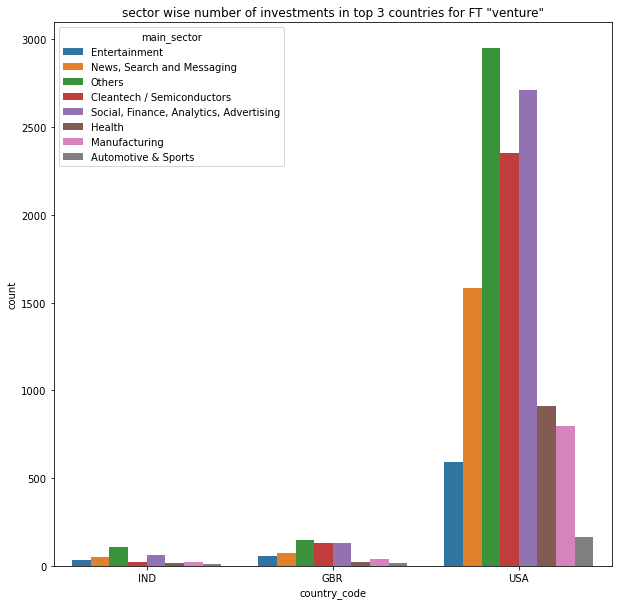

In [81]:
# plot total number of investments in 8 sectors of the top 3 countries
plt.figure(figsize = (10,10))
plt.title('sector wise number of investments in top 3 countries for FT "venture"')
sns.countplot(sparks_dataset.loc[sparks_dataset['country_code'].isin(['USA','GBR','IND']),'country_code'], hue = sparks_dataset.loc[sparks_dataset['country_code'].isin(['USA','GBR','IND']),'main_sector'])

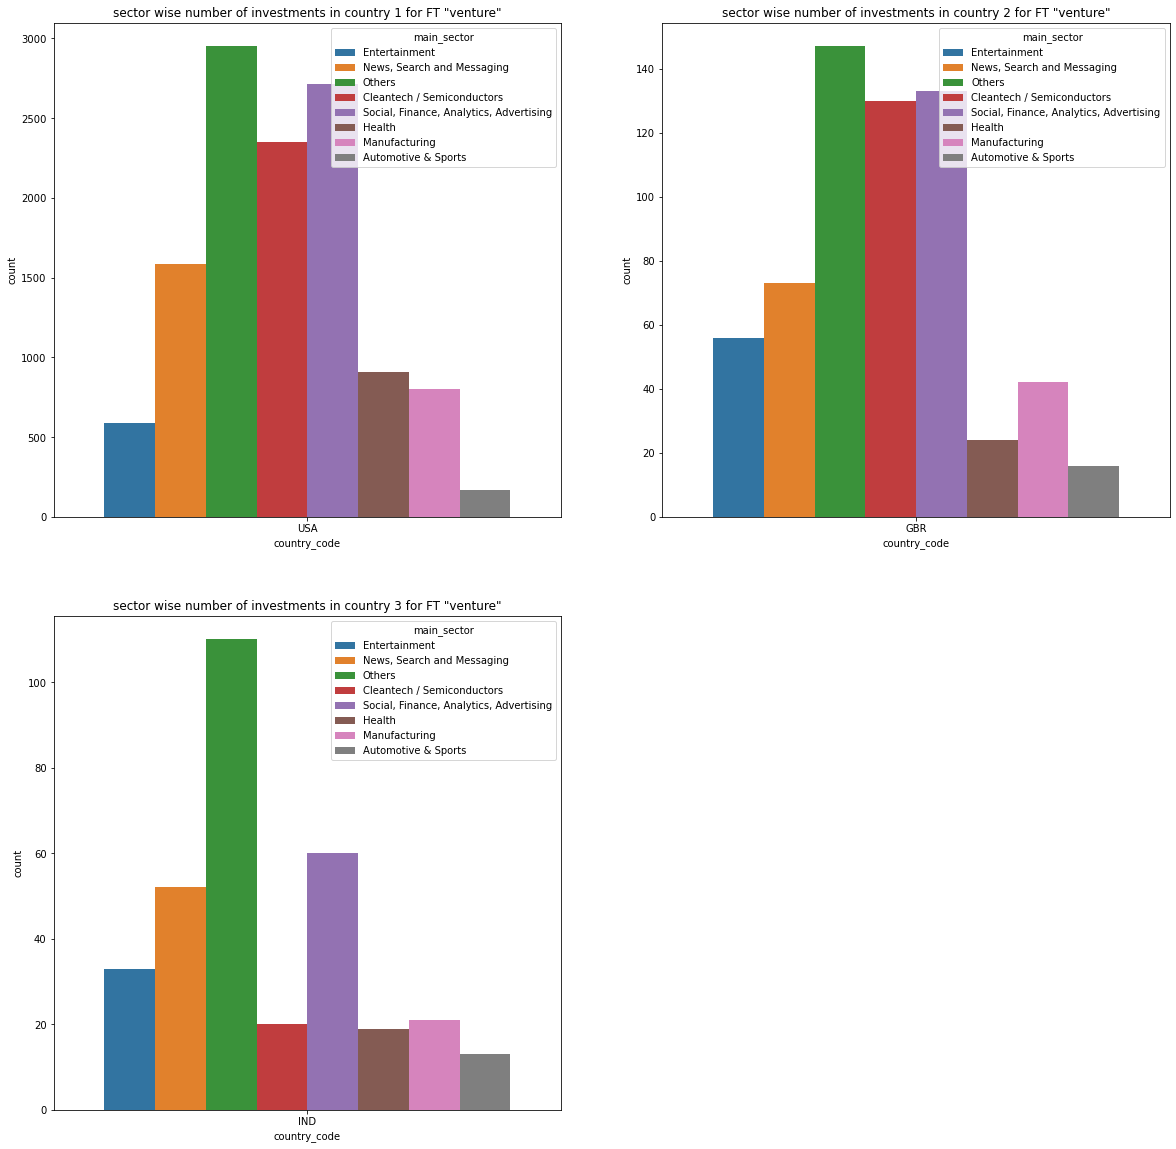

In [82]:
# plot number of investments for each sector in top 3 countries
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.title('sector wise number of investments in country 1 for FT "venture"')
sns.countplot(D1.country_code, hue = D1.main_sector)
plt.subplot(2,2,2)
plt.title('sector wise number of investments in country 2 for FT "venture"')
sns.countplot(D2.country_code, hue = D2.main_sector)
plt.subplot(2,2,3)
plt.title('sector wise number of investments in country 3 for FT "venture"')
sns.countplot(D3.country_code, hue = D3.main_sector)

#### As per the number of investments in each sector of countries, top3 sectors are:
#### top 3 sectors in USA : 1. Others 2. Social Finance, Analytics, Advertising 3. Cleantech / Semiconductors
#### top 3 sectors in GBR : 1. Others 2. Social Finance, Analytics, Advertising 3. Cleantech / Semiconductors
#### top 3 sectors in IND : 1. Others 2. Social Finance, Analytics, Advertising 3. News, Search and Messaging

In [83]:
# create a dataset containing data only for top 3 sectors in top 3 countries
top3_sector_country = pd.concat([D1[D1.main_sector.isin(D1_main_sector)], D2[D2.main_sector.isin(D2_main_sector)],D3[D3.main_sector.isin(D3_main_sector)]], axis = 0)

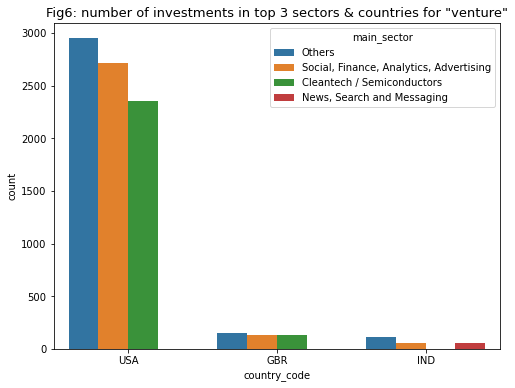

In [84]:
# plot data for top 3 sectors in top 3 countries
plt.figure(figsize = (8,6))
sns.countplot(x = top3_sector_country.country_code, hue = top3_sector_country.main_sector, hue_order = top3_sector_country.main_sector.value_counts().index)
plt.title('Fig6: number of investments in top 3 sectors & countries for "venture"', fontsize = 13)
plt.savefig('number of investments in top 3 sectors & countries.png')

In [85]:
# check which company has received more investment in the top sector - for country 1
sector_gp1 = D1.groupby(['main_sector','company_permalink','name'])
sector_gp1.raised_amount_usd.sum()['Others'].sort_values(ascending = False)

company_permalink                  name               
/ORGANIZATION/VIRTUSTREAM          VIRTUSTREAM            64300000.0
/ORGANIZATION/CAPELLA              CAPELLA PHOTONICS      54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS    AIRTIGHT NETWORKS      54201907.0
/ORGANIZATION/DECARTA              DECARTA                52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE  BLACK DUCK SOFTWARE    51000000.0
                                                             ...    
/ORGANIZATION/CAPTON               CAPTON                  5000000.0
/ORGANIZATION/CAPITAL-TEAS         CAPITAL TEAS            5000000.0
/ORGANIZATION/CAMPUS-QUAD          CAMPUS QUAD             5000000.0
/ORGANIZATION/CAMPUS-EXPLORER      CAMPUS EXPLORER         5000000.0
/ORGANIZATION/NETQOS               NETQOS                  5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

#### 'VIRTUSTREAM' received the highest investment in the best sector (Others) of USA

In [86]:
# check which company has received more investment in the 2nd best sector - for country 1
sector_gp1.raised_amount_usd.sum()['Social, Finance, Analytics, Advertising'].sort_values(ascending = False)

company_permalink               name                           
/ORGANIZATION/SHOTSPOTTER       SST INC. (FORMERLY SHOTSPOTTER)    67933006.0
/ORGANIZATION/DEMANDBASE        DEMANDBASE                         63000000.0
/ORGANIZATION/INTACCT           INTACCT                            61800000.0
/ORGANIZATION/NETBASE           NETBASE SOLUTIONS                  60600000.0
/ORGANIZATION/LOTAME            LOTAME                             59700000.0
                                                                      ...    
/ORGANIZATION/LOGI-ANALYTICS    LOGIANALYTICS                       5000000.0
/ORGANIZATION/SMARTTURN         SMARTTURN                           5000000.0
/ORGANIZATION/FRACTAL-SCIENCES  ACCOMPLICE                          5000000.0
/ORGANIZATION/AMTEC-LCC         AMTEC                               5000000.0
/ORGANIZATION/INITIATE-SYSTEMS  INITIATE SYSTEMS                    5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

#### 'SST INC. (FORMERLY SHOTSPOTTER)' received the highest investment in the second best sector (Social, Finance, Analytics, Advertising) of USA

In [87]:
# checking which company has received more investment in the top sector - for country 2
sector_gp2 = D2.groupby(['main_sector','name'])
sector_gp2.raised_amount_usd.sum()['Others'].sort_values(ascending = False)

name
ELECTRIC CLOUD             37000000.0
SENSAGE                    36250000.0
ENIGMATEC                  32500000.0
SILVERRAIL TECHNOLOGIES    29000000.0
OPENCLOUD                  27972766.0
                              ...    
PHOTOBOX                    5000000.0
BACULA SYSTEMS              5000000.0
UDEX                        5000000.0
PARCELGENIE                 5000000.0
VECTOR WATCH                5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

#### 'ELECTRIC CLOUD' received the highest investment in the best sector (Others) of GBR

In [88]:
# check which company has received more investment in the 2nd best sector - for country 2
sector_gp2.raised_amount_usd.sum()['Social, Finance, Analytics, Advertising'].sort_values(ascending = False)

name
CELLTICK TECHNOLOGIES    37500000.0
MYTHINGS                 34000000.0
ZOPA                     32900000.0
VISUALDNA                28550000.0
MARKETINVOICE            25553007.0
                            ...    
DUEDIL                    5000000.0
MOO.COM                   5000000.0
RANGESPAN                 5000000.0
TAMOCO                    5000000.0
THE FIZZBACK GROUP        5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

#### 'CELLTICK TECHNOLOGIES' received the highest investment in the second best sector (Social, Finance, Analytics, Advertising) of GBR

In [89]:
# checking which company has received more investment in the top sector - for country 3
sector_gp3 = D3.groupby(['main_sector','name'])
sector_gp3.raised_amount_usd.sum()['Others'].sort_values(ascending = False)

name
FIRSTCRY.COM         39000000.0
MYNTRA               38000000.0
COMMONFLOOR          32900000.0
PEPPERFRY.COM        28000000.0
ITZCASH CARD LTD.    25000000.0
                        ...    
REZNEXT               5000000.0
VOONIK                5000000.0
VEDANTU               5000000.0
SECURENS              5000000.0
LIASES FORAS          5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

#### 'FIRSTCRY.COM' received the highest investment in the best sector (Others) of IND

In [90]:
# checking which company has received more investment in the 2nd best sector- for country 3 
sector_gp3.raised_amount_usd.sum()['Social, Finance, Analytics, Advertising'].sort_values(ascending = False)

name
MANTHAN SYSTEMS                                   50700000.0
KOMLI MEDIA                                       28000000.0
SHOPCLUES.COM                                     25000000.0
INTARVO                                           21900000.0
GRAMEEN FINANCIAL SERVICES                        21556050.0
BANKBAZAAR.COM                                    19000000.0
MICROLAND                                         18300000.0
EKA SOFTWARE SOLUTIONS                            16000000.0
QYUKI                                             15400000.0
FINANCIAL INFORMATION NETWORK & OPERATIONS PVT    15000000.0
TRAVELGURU                                        15000000.0
SHIRAM CREDIT                                     15000000.0
APNAPAISA                                         15000000.0
CAPITAL FLOAT                                     13000000.0
YEPME.COM                                         12700000.0
COVERFOX INSURANCE                                12000000.0
FUNDSINDIA         

#### 'MANTHAN SYSTEMS' received the highest investment in the second best sector (Others) of IND